In [ ]:
#| default_exp utils.visualization

# Visualization

> Function for data visualization.

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|export
from fastcore.all import *
from polvo.utils.io import ImageFile
import random
import polvo as pv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid, Grid

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|export
@delegates(plt.subplots)
def show_image(image, ax=None, cmap=None, show:bool=False, **kwargs):
    if ax is None: fig, ax = plt.subplots(**kwargs)
    ax.imshow(image, cmap=cmap)
    ax.set_axis_off()
    if show: plt.show()
    return ax

In [ ]:
data_dir = pv.mkdir('snacks', tmp=True, exist_ok=True, overwrite=True)
data_dir = pv.download_and_extract('https://github.com/lgvaz/polvo-datasets-hub/releases/download/snacks/snacks.zip', data_dir)
image_files = pv.get_image_files(data_dir)

  0%|          | 0/438252 [00:00<?, ?B/s]

In [ ]:
image = pv.open_image(image_files[4])

<AxesSubplot:>

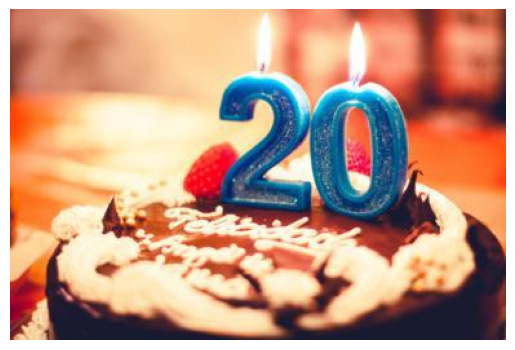

In [ ]:
show_image(image)

In [ ]:
#|export
@delegates(Grid)
def get_grid(
    nitems=None,
    ncols=3,
    nrows=None,
    pad=0.3,
    figsize=None,
    grid_class=Grid,
    **kwargs
):
    "Creates axes optimized for displaying images."
    nrows = nrows or int(np.ceil(nitems / ncols))
    figsize = figsize or (14, 4 * nrows)

    fig = plt.figure(figsize=figsize)
    grid = grid_class(fig, 111, (nrows, ncols), axes_pad=pad, **kwargs)
    
    return fig, grid

In [ ]:
#|export
@delegates(get_grid)
def get_image_grid(nitems=None, ncols=3, nrows=None, pad=0.0, **kwargs):
    "Creates axes optimized for displaying images."
    return get_grid(nitems=nitems, ncols=ncols, nrows=nrows, pad=pad, grid_class=ImageGrid)

In [ ]:
#|export
def show_grid(grid, shows, show=True):
    for ax, show in zip(grid, shows): show(ax=ax)
    if show: plt.show()

In [ ]:
#|export
def normalize_axes(grid, xmax, ymax):
    "Expand all axes to have the same dimensions."
    for ax in grid:
        ax.set_xlim(right=xmax)
        ax.set_ylim(bottom=ymax)

In [ ]:
#|export
@delegates(get_image_grid, but=['nitems'])
def plot_grid(shows, show=True, xmax=None, ymax=None, **kwargs):
    "Quickly plot a grid of images."
    fig, grid = get_image_grid(nitems=len(shows), **kwargs)
    if xmax or ymax: normalize_axes(grid, xmax, ymax)
    show_grid(grid, shows, show=show)
    return fig, grid

In [ ]:
#|export
@delegates(plot_grid, but=['shows'])
def image_grid(images, *args, **kwargs):
    shows = [partial(show_image, o) for o in images]
    return plot_grid(shows, *args, **kwargs)

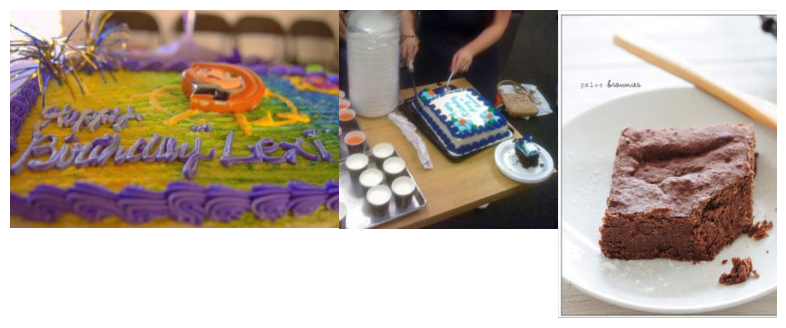

(<Figure size 1400x400 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
image_grid(map(pv.open_image, image_files[:3]))

In [ ]:
#|export
@delegates(image_grid)
def grid_from_sequence(sequence, get_image, nitems=9, idxs=None, **kwargs):
    "Generates a grid of images from a subset of items from the sequence."
    idxs = idxs or random.sample(range(0, len(sequence)), nitems)
    images = []
    for idx in idxs:
        item = sequence[idx]
        images.append(get_image(item))
    
    return image_grid(images, **kwargs)

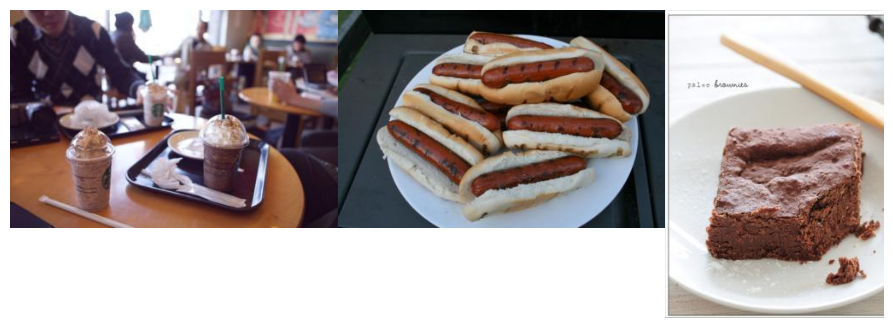

(<Figure size 1400x400 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
grid_from_sequence(image_files, lambda x: pv.open_image(x), nitems=3)

In [ ]:
#|export
def image_size(image_file):
    with pv.open_image(image_file) as image:
        return image.size

In [ ]:
#|export
def image_sizes_hist(
    image_files # Sequence of image filepaths.
):
    "Plot a histogram of widths and heights."
    sizes = parallel(image_size, image_files, progress=pv.pbar)
    widths, heights = zip(*sizes)
    plt.hist(widths, label='width')
    plt.hist(heights, label='heights')
    plt.legend()

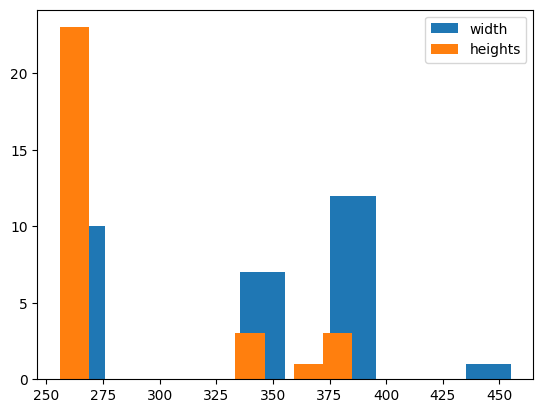

In [ ]:
image_sizes_hist(image_files)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()